## Data Preparation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ardi_data = pd.read_csv('Alcohol-Related_Disease_Impact__ARDI__Application_-_Alcohol-Attributable_Deaths_20240217.csv')
ardi_data.head()

YearStart  YearEnd LocationAbbr   LocationDesc DataSource ConditionType  \
0       2015     2019           WV  West Virginia       ARDI       Chronic   
1       2015     2019           WV  West Virginia       ARDI         Total   
2       2015     2019           US  United States       ARDI         Acute   
3       2015     2019           US  United States       ARDI         Acute   
4       2015     2019           WV  West Virginia       ARDI         Acute   

                     Category        Cause_of_Death  \
0                       Total  Total for All Causes   
1                       Total  Total for All Causes   
2  Alcohol-Related Poisonings     Alcohol poisoning   
3  Alcohol-Related Poisonings     Alcohol poisoning   
4                       Total  Total for All Causes   

               Data_Value_Unit  Data_Value_Type  ... ConditionTypeID  \
0  Alcohol-attributable deaths  5 years average  ...          EXCSVE   
1  Alcohol-attributable deaths  5 years average  ...          EXCSVE   
2  Alcohol-attributable deaths  5 years average  ...           ACUTE   
3  Alcohol-attributable deaths  5 years average  ...           ACUTE   
4  Alcohol-attributable deaths  5 years average  ...          ANYALC   

   CategoryID Cause_of_DeathID EffectID ConsumptionID SexID AgeCategoryID  \
0         TOT           TOTALL  HARMEFF        EXCSVE  GENF          UN21   
1         TOT           TOTALL  HARMEFF        EXCSVE  GENF          UN21   
2        CAT6           ALCPOI  HARMEFF        EXCSVE  GENF          UN21   
3        CAT6           ALCPOI  HARMEFF        EXCSVE  GENM           OTH   
4         TOT           TOTALL  HARMEFF        ANYALC  GENM           OTH   

  AgeGroupID DataValueTypeID  DataValueUnitId  
0       Age0             AAD        5YEARSAVG  
1       Age0             AAD        5YEARSAVG  
2      Age21             AAD        5YEARSAVG  
3       Age0             AAD        5YEARSAVG  
4       Age0             AAD        5YEARSAVG  

[5 rows x 30 columns]

In [3]:
ardi_data.shape

(62504, 30)

In [4]:
missing_values = ardi_data.isnull().sum()

missing_values

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
ConditionType                     0
Category                          0
Cause_of_Death                    0
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value                      312
Data_Value_Alt                49323
Data_Value_Footnote_Symbol    52564
Data_Value_Footnote           52564
Effect                            0
ConsumptionPattern                0
Sex                               0
AgeCategory                       0
AgeGroup                          0
LocationID                        0
ConditionTypeID                   0
CategoryID                        0
Cause_of_DeathID                  0
EffectID                          0
ConsumptionID                     0
SexID                             0
AgeCategoryID                     0
AgeGroupID                  

In [5]:
# Check for zero values
zero_values = ardi_data[ardi_data['Data_Value_Alt'] == 0]

# Check for empty cells (NaN or None)
empty_cells = ardi_data[ardi_data['Data_Value_Alt'].isnull() | (ardi_data['Data_Value_Alt'] == '')]

# # Display the rows with zero values and empty cells
# print("Rows with zero values:")
# print(zero_values)

# print("\nRows with empty cells:")
# print(empty_cells)

In [6]:
# Check for negative values
negative_values = ardi_data[ardi_data['Data_Value_Alt'] < 0]

# Display rows with negative values
print("Rows with negative values:")
# print(negative_values)

# Drop rows with negative values
ardi_data = ardi_data[ardi_data['Data_Value_Alt'] >= 0]




Rows with negative values:


In [7]:
ardi_data.shape

(13147, 30)

In [8]:
# Drop rows with empty cells (NaN or None) in the 'Data_value' column the target variable
ardi_data = ardi_data.dropna(subset=['Data_Value_Alt'])

ardi_data.isnull().sum()

# ardi_data.to_csv("new_try.csv")

# Check for zero values
zero_values = ardi_data[ardi_data['Data_Value_Alt'] == 0].count()

# Display rows with zero values
print("Rows with zero values:")
print(zero_values)

ardi_data.shape

Rows with zero values:
YearStart                     329
YearEnd                       329
LocationAbbr                  329
LocationDesc                  329
DataSource                    329
ConditionType                 329
Category                      329
Cause_of_Death                329
Data_Value_Unit               329
Data_Value_Type               329
Data_Value                    329
Data_Value_Alt                329
Data_Value_Footnote_Symbol     73
Data_Value_Footnote            73
Effect                        329
ConsumptionPattern            329
Sex                           329
AgeCategory                   329
AgeGroup                      329
LocationID                    329
ConditionTypeID               329
CategoryID                    329
Cause_of_DeathID              329
EffectID                      329
ConsumptionID                 329
SexID                         329
AgeCategoryID                 329
AgeGroupID                    329
DataValueTypeID          

(13147, 30)

In [9]:
ardi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13147 entries, 0 to 62503
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   13147 non-null  int64  
 1   YearEnd                     13147 non-null  int64  
 2   LocationAbbr                13147 non-null  object 
 3   LocationDesc                13147 non-null  object 
 4   DataSource                  13147 non-null  object 
 5   ConditionType               13147 non-null  object 
 6   Category                    13147 non-null  object 
 7   Cause_of_Death              13147 non-null  object 
 8   Data_Value_Unit             13147 non-null  object 
 9   Data_Value_Type             13147 non-null  object 
 10  Data_Value                  13147 non-null  object 
 11  Data_Value_Alt              13147 non-null  float64
 12  Data_Value_Footnote_Symbol  73 non-null     object 
 13  Data_Value_Footnote         73 

In [10]:
# Convert start year and end year to date as years alone
ardi_data['YearStart'] = pd.to_datetime(ardi_data['YearStart'], format='%Y').dt.year
ardi_data['YearEnd'] = pd.to_datetime(ardi_data['YearEnd'], format='%Y').dt.year

# Verify the changes
print(ardi_data.dtypes)


YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
DataSource                     object
ConditionType                  object
Category                       object
Cause_of_Death                 object
Data_Value_Unit                object
Data_Value_Type                object
Data_Value                     object
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Effect                         object
ConsumptionPattern             object
Sex                            object
AgeCategory                    object
AgeGroup                       object
LocationID                      int64
ConditionTypeID                object
CategoryID                     object
Cause_of_DeathID               object
EffectID                       object
ConsumptionID                  object
SexID                          object
AgeCategoryI

In [11]:
# Check the unique values in the 'AgeGroup_New' column
unique_age_groups = ardi_data['AgeGroup'].unique()

# Print the unique age groups
print(unique_age_groups)


['Overall' 'Under 21' '65+' '0-19' '20-34' '35-49' '50-64']


In [12]:
# Define a mapping dictionary to map each age group to its corresponding category
age_group_mapping = {
    'Under 21': 'Under 21',
    '0-19': 'Under 21',    # Merged '0-19' with 'Under 21'
    '20-34': '21-34',
    '35-49': '35-49',
    '50-64': '50-64',
    '65+': '65 and older',  # Changed '65+' to '61 and older' to match the specified category
    'Overall': 'Overall'
}

# Map the age group strings to their corresponding categories using the mapping dictionary
ardi_data['AgeGroup_Cat'] = ardi_data['AgeGroup'].map(age_group_mapping)

# Display the unique values in the new column to verify the categorization
print(ardi_data['AgeGroup_Cat'].unique())


['Overall' 'Under 21' '65 and older' '21-34' '35-49' '50-64']


In [13]:
ardi_data

YearStart  YearEnd LocationAbbr   LocationDesc DataSource  \
0           2015     2019           WV  West Virginia       ARDI   
1           2015     2019           WV  West Virginia       ARDI   
2           2015     2019           US  United States       ARDI   
3           2015     2019           US  United States       ARDI   
4           2015     2019           WV  West Virginia       ARDI   
...          ...      ...          ...            ...        ...   
62499       2015     2019           WY        Wyoming       ARDI   
62500       2015     2019           WY        Wyoming       ARDI   
62501       2015     2019           WY        Wyoming       ARDI   
62502       2015     2019           WY        Wyoming       ARDI   
62503       2015     2019           WY        Wyoming       ARDI   

      ConditionType                    Category        Cause_of_Death  \
0           Chronic                       Total  Total for All Causes   
1             Total                       Total  Total for All Causes   
2             Acute  Alcohol-Related Poisonings     Alcohol poisoning   
3             Acute  Alcohol-Related Poisonings     Alcohol poisoning   
4             Acute                       Total  Total for All Causes   
...             ...                         ...                   ...   
62499       Chronic                       Total  Total for All Causes   
62500         Total                       Total  Total for All Causes   
62501         Acute                       Total  Total for All Causes   
62502       Chronic                       Total  Total for All Causes   
62503         Total                       Total  Total for All Causes   

                   Data_Value_Unit  Data_Value_Type  ... CategoryID  \
0      Alcohol-attributable deaths  5 years average  ...        TOT   
1      Alcohol-attributable deaths  5 years average  ...        TOT   
2      Alcohol-attributable deaths  5 years average  ...       CAT6   
3      Alcohol-attributable deaths  5 years average  ...       CAT6   
4      Alcohol-attributable deaths  5 years average  ...        TOT   
...                            ...              ...  ...        ...   
62499  Alcohol-attributable deaths  5 years average  ...        TOT   
62500  Alcohol-attributable deaths  5 years average  ...        TOT   
62501  Alcohol-attributable deaths  5 years average  ...        TOT   
62502  Alcohol-attributable deaths  5 years average  ...        TOT   
62503  Alcohol-attributable deaths  5 years average  ...        TOT   

       Cause_of_DeathID EffectID ConsumptionID   SexID AgeCategoryID  \
0                TOTALL  HARMEFF        EXCSVE    GENF          UN21   
1                TOTALL  HARMEFF        EXCSVE    GENF          UN21   
2                ALCPOI  HARMEFF        EXCSVE    GENF          UN21   
3                ALCPOI  HARMEFF        EXCSVE    GENM           OTH   
4                TOTALL  HARMEFF        ANYALC    GENM           OTH   
...                 ...      ...           ...     ...           ...   
62499            TOTALL  HARMEFF        ANYALC  GENALL           OTH   
62500            TOTALL  HARMEFF        ANYALC  GENALL           OTH   
62501            TOTALL  HARMEFF        EXCSVE  GENALL           OTH   
62502            TOTALL  HARMEFF        EXCSVE  GENALL           OTH   
62503            TOTALL  HARMEFF        EXCSVE  GENALL           OTH   

      AgeGroupID DataValueTypeID DataValueUnitId  AgeGroup_Cat  
0           Age0             AAD       5YEARSAVG       Overall  
1           Age0             AAD       5YEARSAVG       Overall  
2          Age21             AAD       5YEARSAVG      Under 21  
3           Age0             AAD       5YEARSAVG       Overall  
4           Age0             AAD       5YEARSAVG       Overall  
...          ...             ...             ...           ...  
62499       Age5             AAD       5YEARSAVG  65 and older  
62500       Age5             AAD       5YEARSAVG  65 and older  
62501     

In [14]:
# dropping the added encoding the data 
ardi_data_c = ardi_data.copy()
ardi_data_c = ardi_data_c[['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource', 'ConditionType',
         'Category', 'Cause_of_Death', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value',
         'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Effect',
         'ConsumptionPattern', 'Sex', 'AgeGroup', 'AgeGroup_Cat']]

# Drop specified columns
ardi_data_c.drop(['Data_Value_Unit', 'Data_Value_Type', 'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote'], axis=1, inplace=True)
# Drop rows where LocationDesc is 'United States'
ardi_data_c = ardi_data_c[ardi_data_c['LocationDesc'] != 'United States']

ardi_data_c 
ardi_data_c.to_csv("Cleaned_1_data.csv",index=False)

In [15]:
# from sklearn.preprocessing import LabelEncoder

# # Encode categorical variables
# label_encoders = {}
# categorical_columns = ['LocationAbbr','Sex', 'ConditionType', 'AgeGroup','Category','Cause_of_Death']  # List of categorical columns to encode

# for col in categorical_columns:
#     le = LabelEncoder()
#     ardi_data_c[col] = le.fit_transform(ardi_data_c[col])
#     label_encoders[col] = le

C:\Users\adedi\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


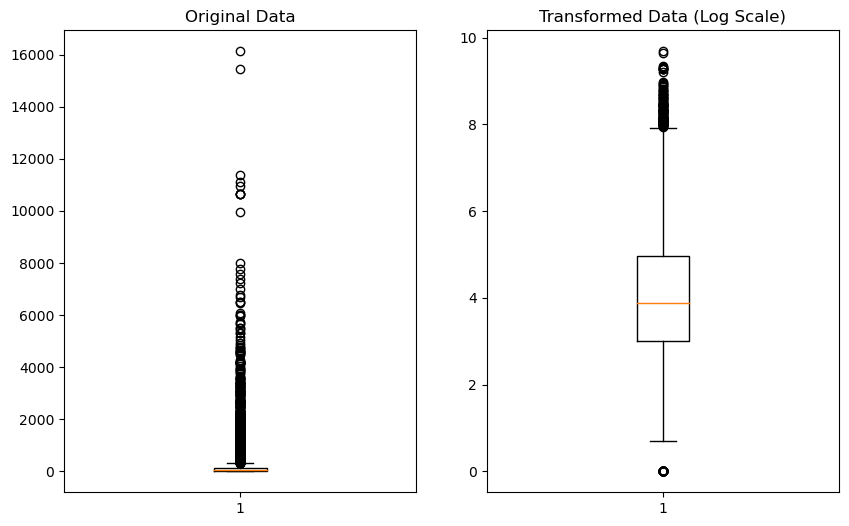

In [16]:
"""Log transformation is particularly effective for right-skewed data, as it compresses larger values more than smaller ones.
This helps to spread out the data and make the distribution more symmetric.
Log transformation is commonly used in health data analysis, especially for variables such as income, 
biomarker measurements, or other health-related indicators."""


# Example dataset with outliers
data = ardi_data_c['Data_Value_Alt']

# Apply log transformation
transformed_data = np.log(ardi_data_c['Data_Value_Alt'])

# Plot boxplots for original and transformed data
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.boxplot(data)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.boxplot(transformed_data)
plt.title('Transformed Data (Log Scale)')

plt.show()


## DATA EXPLORATION and Visualization

In [17]:
ardi_data_c.describe()

YearStart  YearEnd  Data_Value_Alt
count    11985.0  11985.0    11985.000000
mean      2015.0   2019.0      210.321569
std          0.0      0.0      621.517825
min       2015.0   2019.0        0.000000
25%       2015.0   2019.0       20.000000
50%       2015.0   2019.0       48.000000
75%       2015.0   2019.0      145.000000
max       2015.0   2019.0    16132.000000

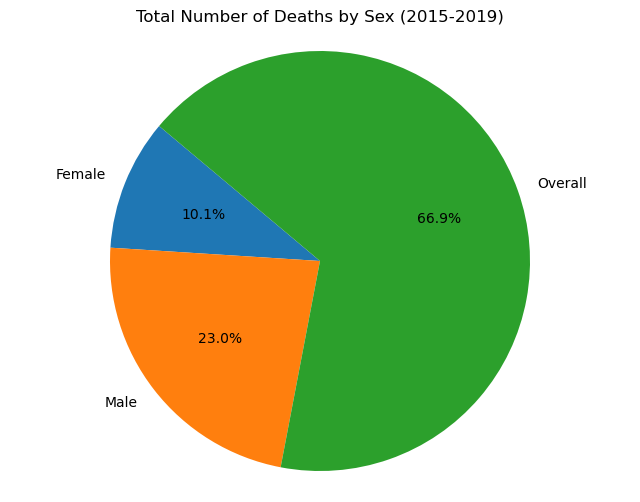

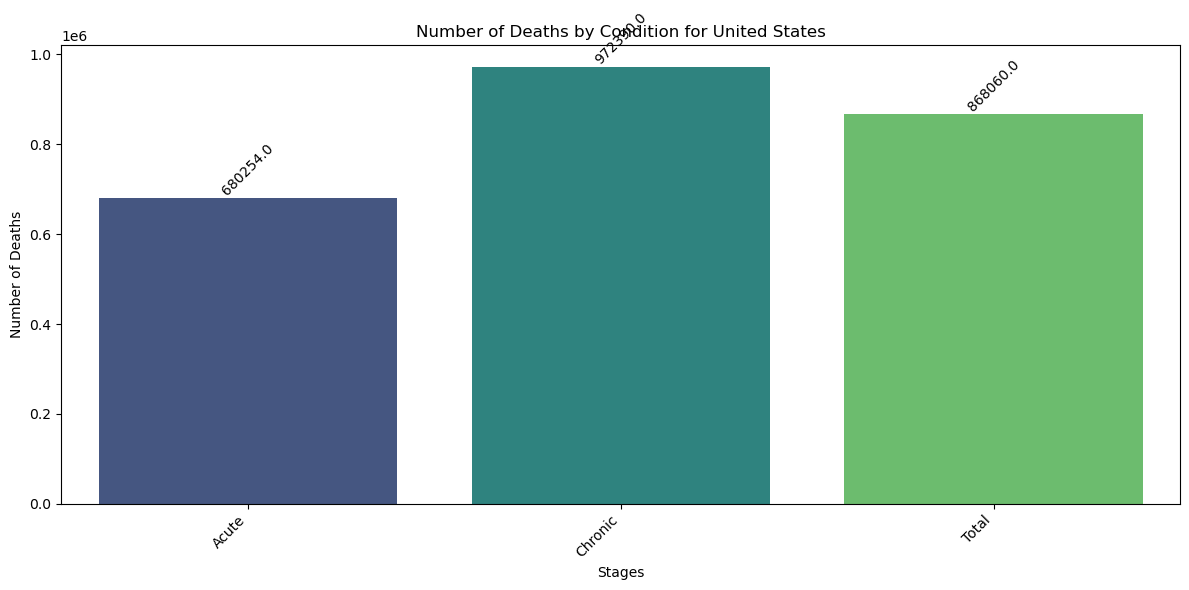

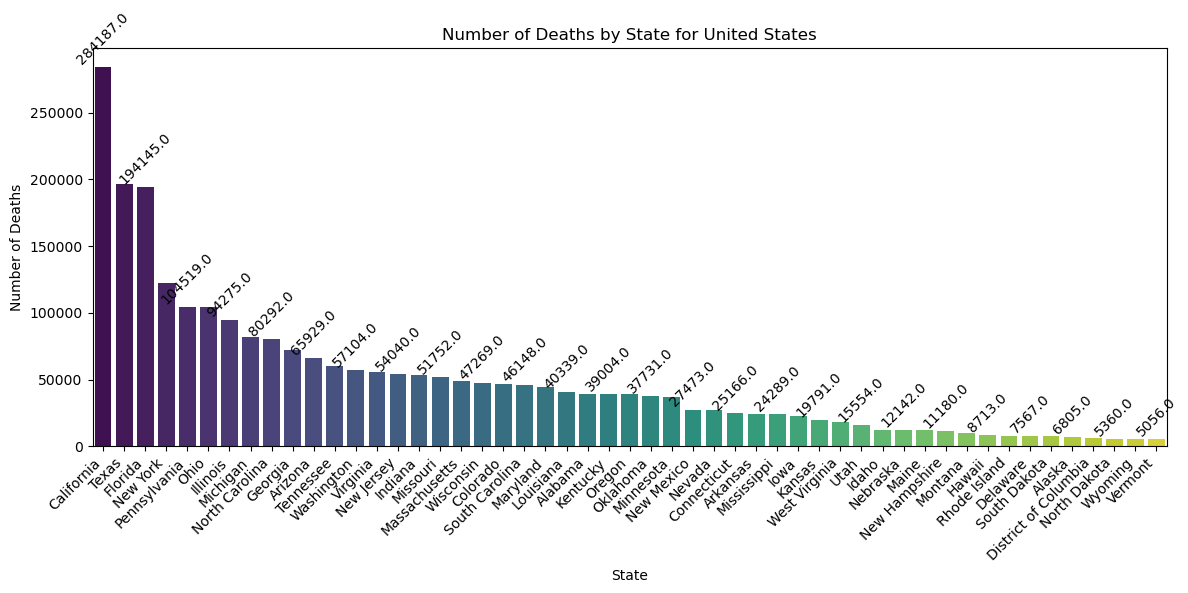

In [18]:
# Group the data by 'Sex' and calculate the total number of deaths
total_deaths_by_sex = ardi_data_c.groupby('Sex')['Data_Value_Alt'].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(total_deaths_by_sex, labels=total_deaths_by_sex.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Number of Deaths by Sex (2015-2019)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming ardi_data_c is your DataFrame and already imported

# Grouping and summing data
total_deaths_by_type = ardi_data_c.groupby('ConditionType')['Data_Value_Alt'].sum().reset_index()

plt.figure(figsize=(12, 6))
# Now you can directly use total_deaths_by_type as it's correctly formatted
ax = sns.barplot(x='ConditionType', y='Data_Value_Alt', data=total_deaths_by_type, palette='viridis')
plt.title('Number of Deaths by Condition for United States')
plt.xlabel('Stages')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Correcting the annotation loop
# Note: Adjust the "+ 10" in the y parameter if the annotations don't fit well visually
for i, (condition, total) in enumerate(zip(total_deaths_by_type['ConditionType'], total_deaths_by_type['Data_Value_Alt'])):
    plt.text(i, total + 10, str(round(total, 2)), ha='center', va='bottom', rotation=45)

plt.tight_layout()
plt.show()




# Filter out the row with state name 'United States'
data_filtered = ardi_data_c[ardi_data_c['LocationDesc'] != 'United States']

# Group data by state and sum the number of deaths
deaths_by_state = data_filtered.groupby('LocationDesc')['Data_Value_Alt'].sum().reset_index()

# Sorting the data by the number of deaths
deaths_by_state = deaths_by_state.sort_values(by='Data_Value_Alt', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='LocationDesc', y='Data_Value_Alt', data=deaths_by_state, palette='viridis')
plt.title('Number of Deaths by State for United States')
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add annotation in interval of 2 bins
for i in range(0, len(deaths_by_state), 2):
    plt.text(i, deaths_by_state.iloc[i]['Data_Value_Alt'] + 10, str(deaths_by_state.iloc[i]['Data_Value_Alt']), ha='center', va='bottom', rotation=45)

plt.tight_layout()
plt.show()




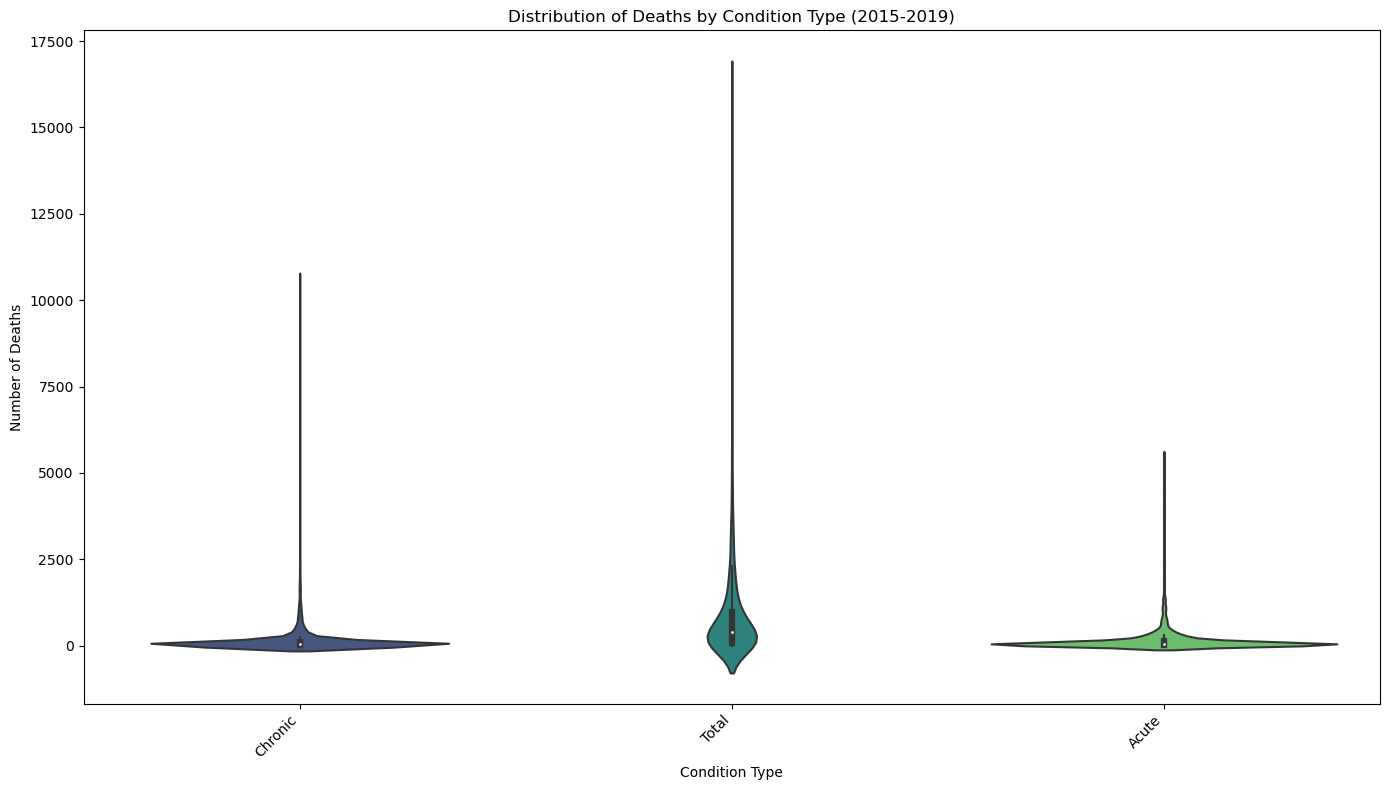

In [19]:
# from sklearn.preprocessing import LabelEncoder

# # Assuming your DataFrame is named df

# # Initialize the label encoder
# label_encoder = LabelEncoder()

# # Fit and transform the 'ConditionType' column to encode it
# ardi_data_c['ConditionType_Encoded'] = label_encoder.fit_transform(ardi_data_c['ConditionType'])

# # Now 'ConditionType_Encoded' is your NumAttribute
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=ardi_data_c, x='ConditionType_Encoded', y='Data_Value_Alt', hue='ConditionType', palette='viridis')

# plt.title('Data_Value_Alt vs. Encoded ConditionType')
# plt.xlabel('Encoded ConditionType')
# plt.ylabel('Data_Value_Alt')

# # Displaying the legend outside the plot
# plt.legend(title='Condition Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.tight_layout()
# plt.show()



plt.figure(figsize=(14, 8))
sns.violinplot(x='ConditionType', y='Data_Value_Alt', data=ardi_data_c, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Deaths by Condition Type (2015-2019)')
plt.xlabel('Condition Type')
plt.ylabel('Number of Deaths')
plt.tight_layout()
plt.show()


In [20]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# import geopandas as gpd
# import matplotlib.pyplot as plt

# # Assuming your DataFrame is named df and contains relevant columns like LocationDesc and Data_Value_Alt

# # Select relevant features
# X = ardi_data_c[['LocationDesc', 'Data_Value_Alt']]

# # Feature scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X.drop(columns=['LocationDesc']))

# # Clustering
# kmeans = KMeans(n_clusters=5, random_state=42)
# df['Cluster'] = kmeans.fit_predict(X_scaled)

# # Visualization
# # Load US map data
# us_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # Merge cluster labels with US map data
# us_map = us_map.merge(ardi_data_c[['LocationDesc', 'Cluster']], how='left', left_on='name', right_on='LocationDesc')

# # Plot the map
# fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# us_map.plot(column='Cluster', categorical=True, legend=True, ax=ax, cmap='viridis', edgecolor='black')
# plt.title('Clusters of States with Similar Alcohol-Related Death Rates')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()


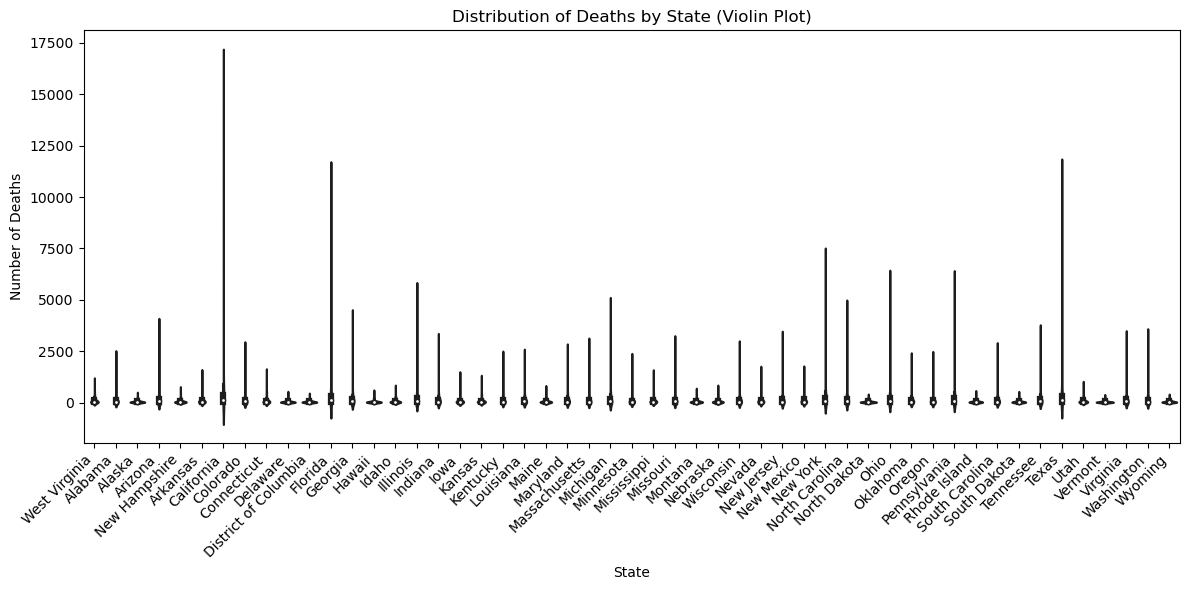

In [21]:
# or
# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='LocationDesc', y='Data_Value_Alt', data=data_filtered, palette='viridis')
plt.title('Distribution of Deaths by State (Violin Plot)')
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

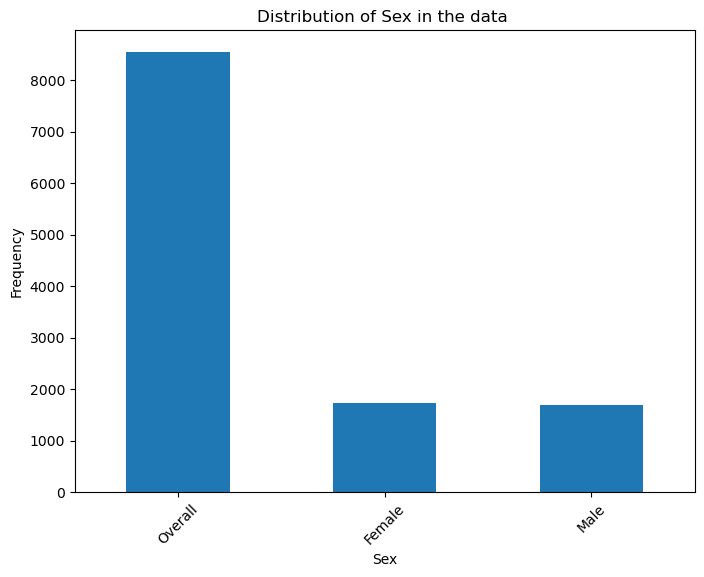

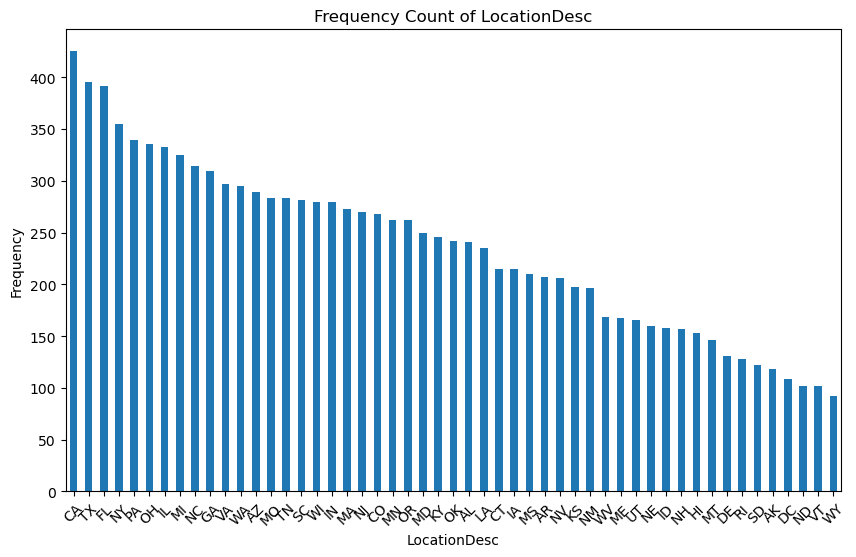

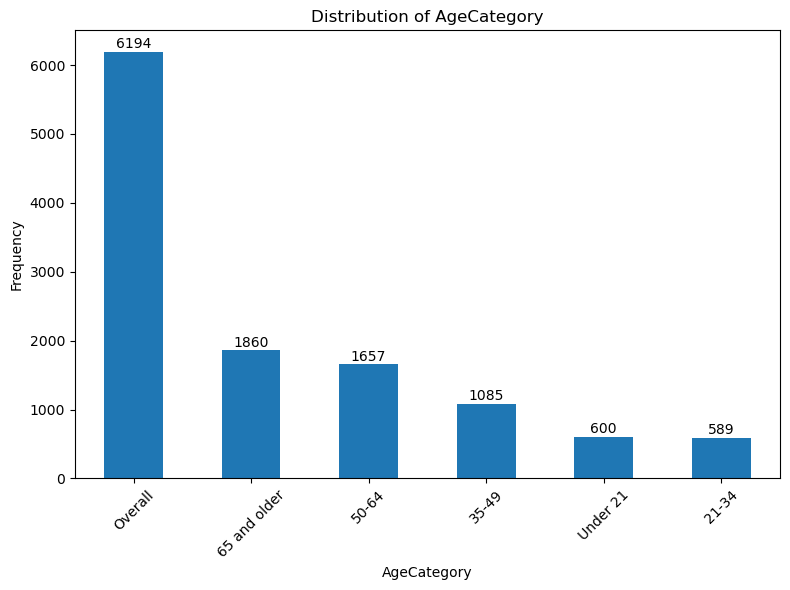

In [22]:
# Calculate mode separately
mode_values = ardi_data_c.mode()
# print(mode_values)

# Frequency count of 'AgeCategory' categorical variable (bar chart) with annotation
plt.figure(figsize=(8, 6))
counts = ardi_data_c['Sex'].value_counts()
counts.plot(kind='bar')
plt.title('Distribution of Sex in the data ')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks(rotation=45)


# Bar Chart for Frequency Count of 'LocationDesc'
plt.figure(figsize=(10, 6))
ardi_data_c['LocationAbbr'].value_counts().plot(kind='bar')
plt.title('Frequency Count of LocationDesc')
plt.xlabel('LocationDesc')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


# Frequency count of 'AgeCategory' categorical variable (bar chart) with annotation
plt.figure(figsize=(8, 6))
counts = ardi_data_c['AgeGroup_Cat'].value_counts()
counts.plot(kind='bar')
plt.title('Distribution of AgeCategory')
plt.xlabel('AgeCategory')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Add annotation
for i, count in enumerate(counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


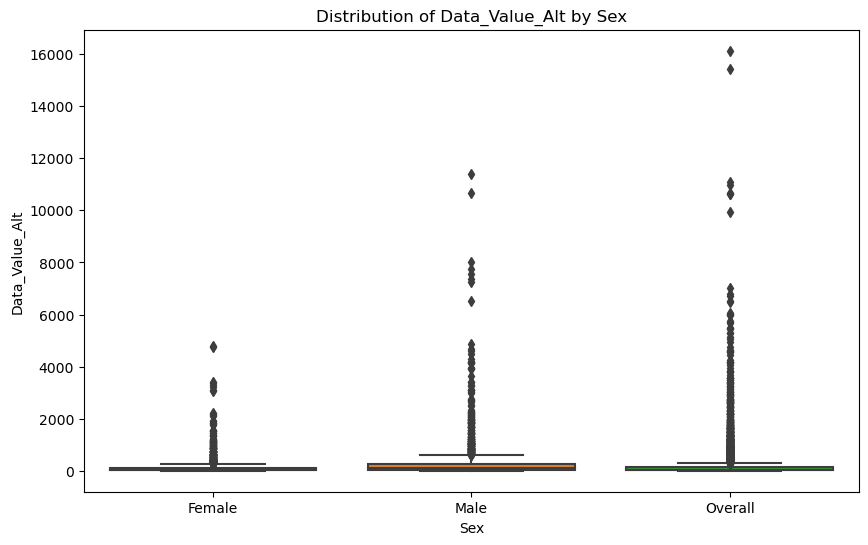

In [23]:
import seaborn as sns

# Box Plot for 'Data_Value_Alt' grouped by 'Sex'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Data_Value_Alt', data=ardi_data_c)
plt.title('Distribution of Data_Value_Alt by Sex')
plt.xlabel('Sex')
plt.ylabel('Data_Value_Alt')
plt.show()


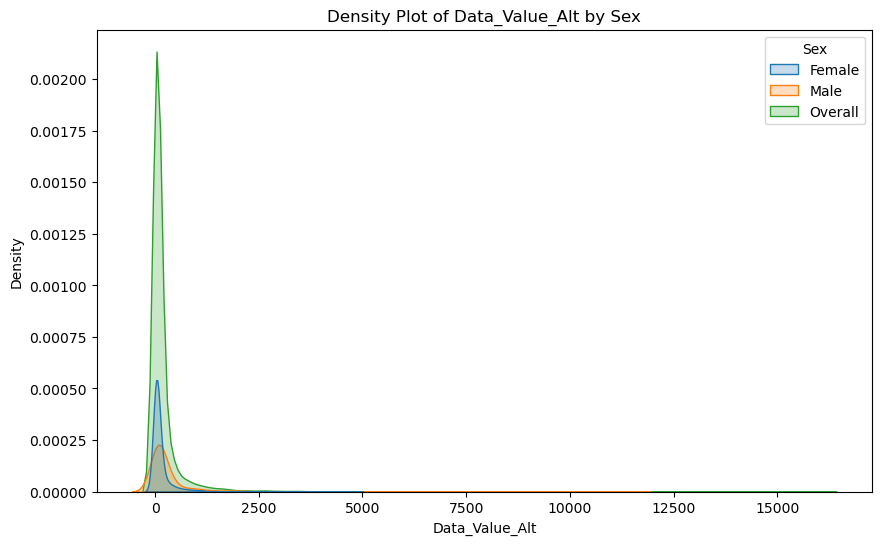

In [24]:
# Density Plot for 'Data_Value_Alt' grouped by 'Sex'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=ardi_data_c, x='Data_Value_Alt', hue='Sex', fill=True)
plt.title('Density Plot of Data_Value_Alt by Sex')
plt.xlabel('Data_Value_Alt')
plt.ylabel('Density')
plt.show()


## univarate analysis

In [25]:
ardi_data_c

YearStart  YearEnd LocationAbbr   LocationDesc DataSource  \
0           2015     2019           WV  West Virginia       ARDI   
1           2015     2019           WV  West Virginia       ARDI   
4           2015     2019           WV  West Virginia       ARDI   
5           2015     2019           WV  West Virginia       ARDI   
6           2015     2019           WV  West Virginia       ARDI   
...          ...      ...          ...            ...        ...   
62499       2015     2019           WY        Wyoming       ARDI   
62500       2015     2019           WY        Wyoming       ARDI   
62501       2015     2019           WY        Wyoming       ARDI   
62502       2015     2019           WY        Wyoming       ARDI   
62503       2015     2019           WY        Wyoming       ARDI   

      ConditionType Category        Cause_of_Death  Data_Value_Alt  \
0           Chronic    Total  Total for All Causes             0.0   
1             Total    Total  Total for All Causes             7.0   
4             Acute    Total  Total for All Causes           367.0   
5           Chronic    Total  Total for All Causes           406.0   
6             Total    Total  Total for All Causes           773.0   
...             ...      ...                   ...             ...   
62499       Chronic    Total  Total for All Causes            83.0   
62500         Total    Total  Total for All Causes           102.0   
62501         Acute    Total  Total for All Causes            19.0   
62502       Chronic    Total  Total for All Causes            77.0   
62503         Total    Total  Total for All Causes            96.0   

                Effect     ConsumptionPattern      Sex AgeGroup  AgeGroup_Cat  
0      Harmful Effects  Excessive Alcohol Use   Female  Overall       Overall  
1      Harmful Effects  Excessive Alcohol Use   Female  Overall       Overall  
4      Harmful Effects        Any Alcohol Use     Male  Overall       Overall  
5      Harmful Effects        Any Alcohol Use     Male  Overall       Overall  
6      Harmful Effects        Any Alcohol Use     Male  Overall       Overall  
...                ...                    ...      ...      ...           ...  
62499  Harmful Effects        Any Alcohol Use  Overall      65+  65 and older  
62500  Harmful Effects        Any Alcohol Use  Overall      65+  65 and older  
62501  Harmful Effects  Excessive Alcohol Use  Overall      65+  65 and older  
62502  Harmful Effects  Excessive Alcohol Use  Overall      65+  65 and older  
62503  Harmful Effects  Excessive Alcohol Use  Overall      65+  65 and older  

[11985 rows x 14 columns]

count    11985.000000
mean       210.321569
std        621.517825
min          0.000000
25%         20.000000
50%         48.000000
75%        145.000000
max      16132.000000
Name: Data_Value_Alt, dtype: float64


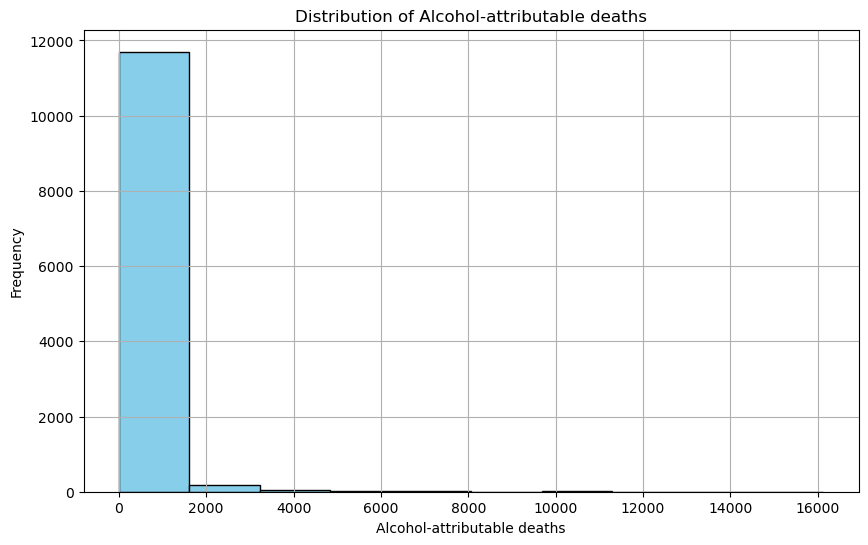

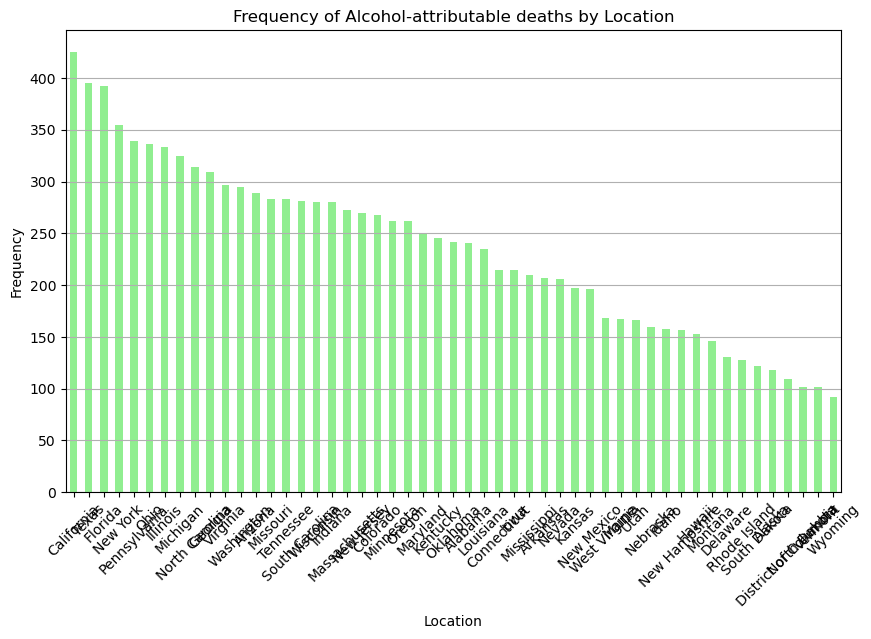

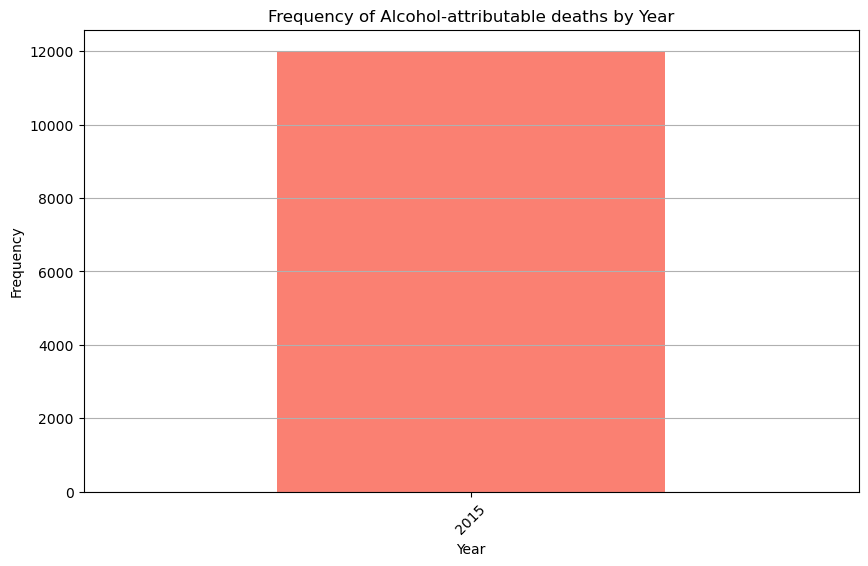

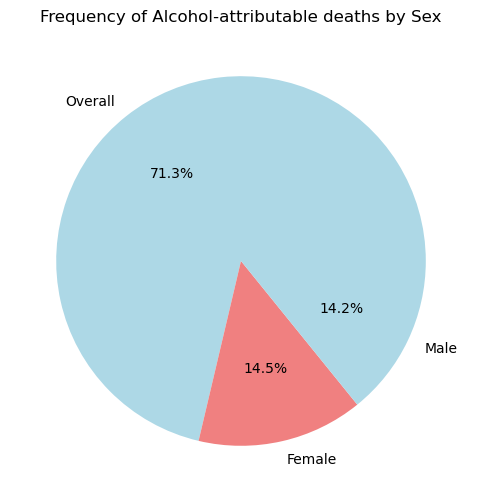

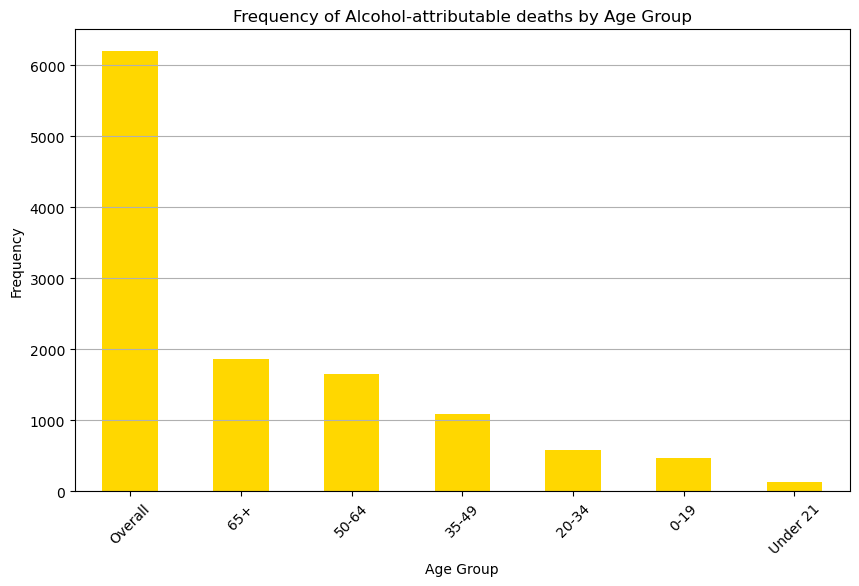

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


# Summary statistics
summary_stats = ardi_data_c["Data_Value_Alt"].describe()
print(summary_stats)

# Distribution analysis
plt.figure(figsize=(10, 6))
plt.hist(ardi_data_c["Data_Value_Alt"], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Alcohol-attributable deaths')
plt.ylabel('Frequency')
plt.title('Distribution of Alcohol-attributable deaths')
plt.grid(True)
plt.show()

# Frequency analysis - by location
location_counts = ardi_data_c['LocationDesc'].value_counts()
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Frequency of Alcohol-attributable deaths by Location')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Frequency analysis - by year
year_counts = ardi_data_c['YearStart'].value_counts()
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='salmon')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Alcohol-attributable deaths by Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Frequency analysis - by sex
sex_counts = ardi_data_c['Sex'].value_counts()
plt.figure(figsize=(6, 6))
sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Frequency of Alcohol-attributable deaths by Sex')
plt.ylabel('')
plt.show()

# Frequency analysis - by age group
age_counts = ardi_data_c['AgeGroup'].value_counts()
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='gold')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Frequency of Alcohol-attributable deaths by Age Group')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## bivaraite analysis

C:\Users\adedi\AppData\Local\Temp\ipykernel_12264\198226210.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



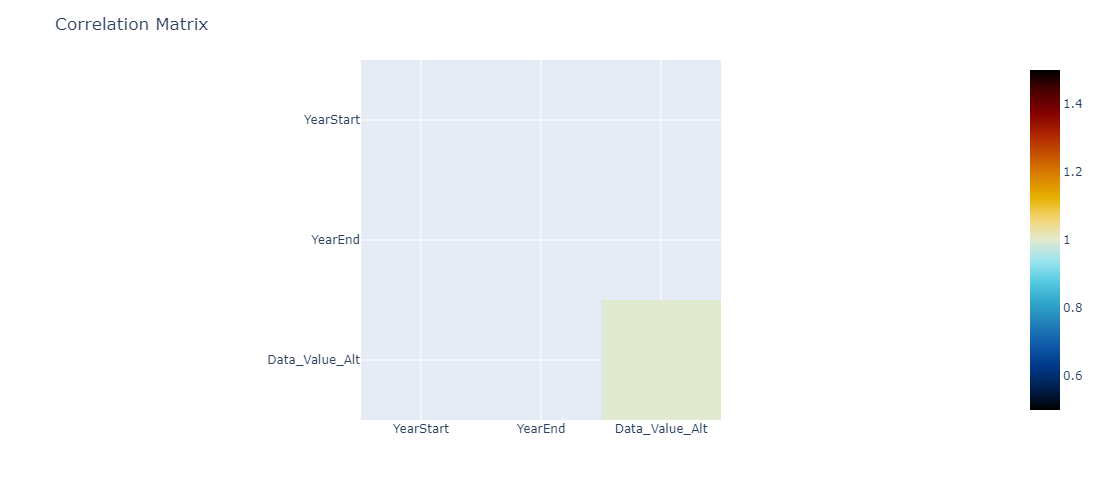

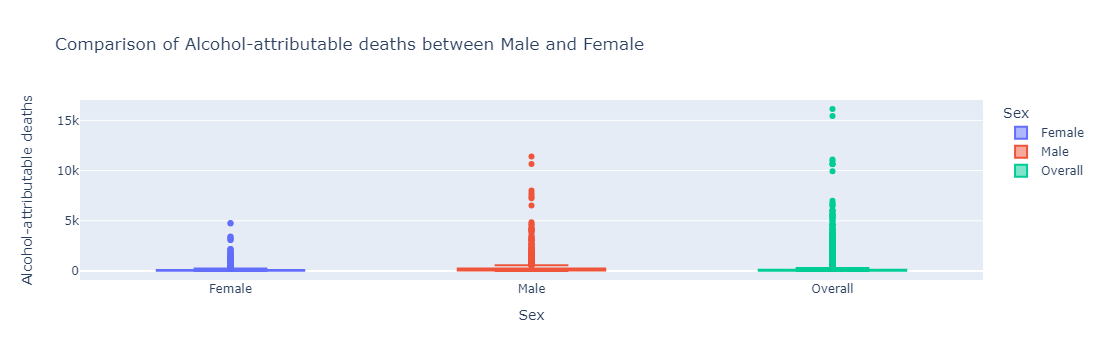

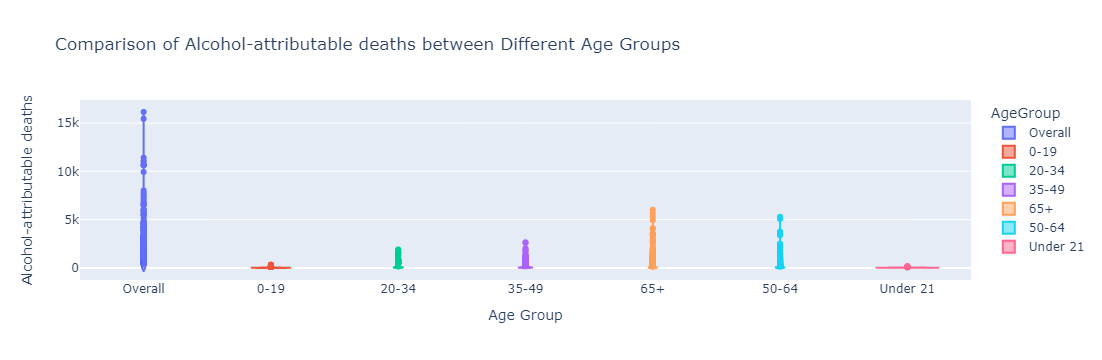

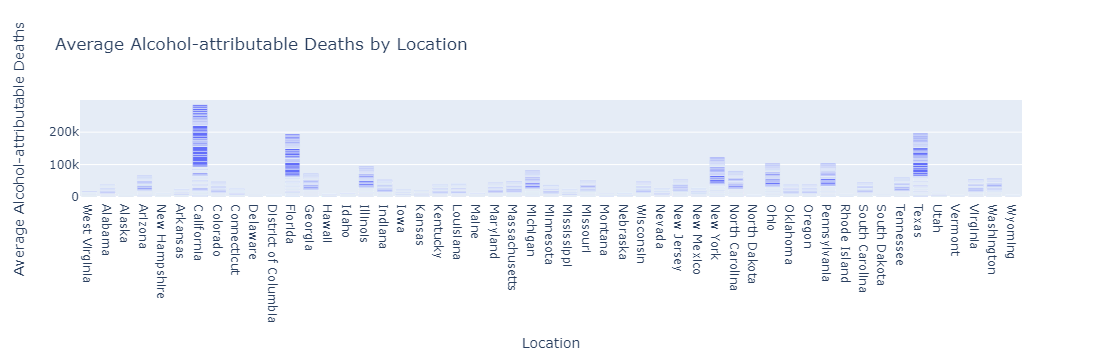

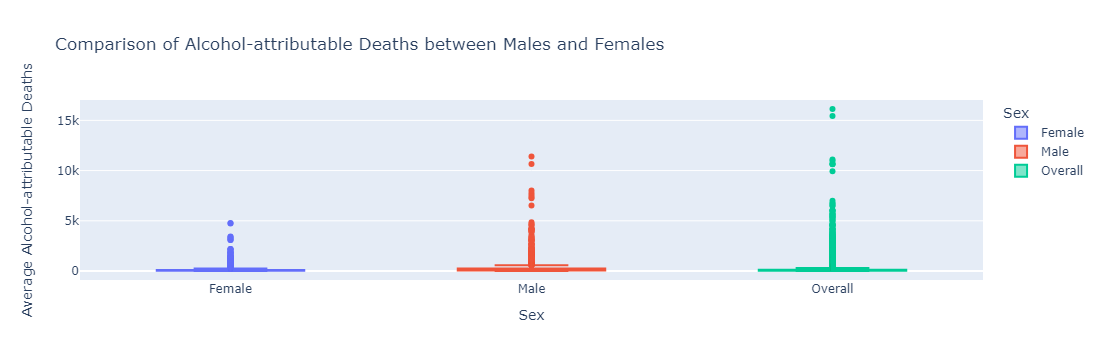

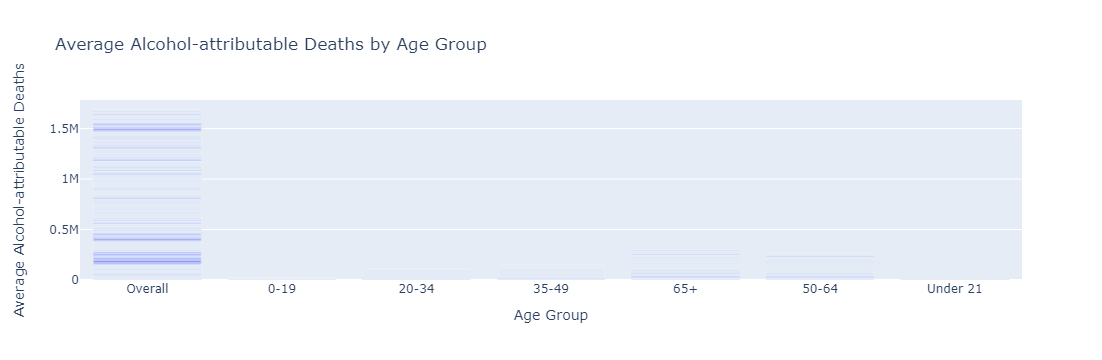

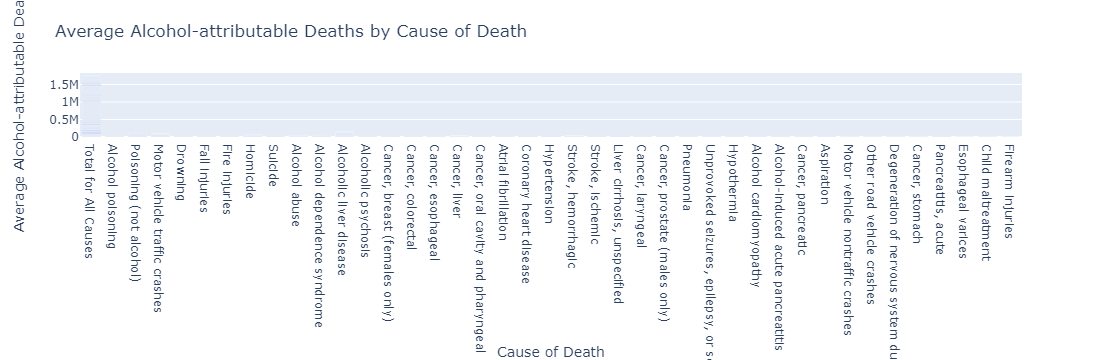

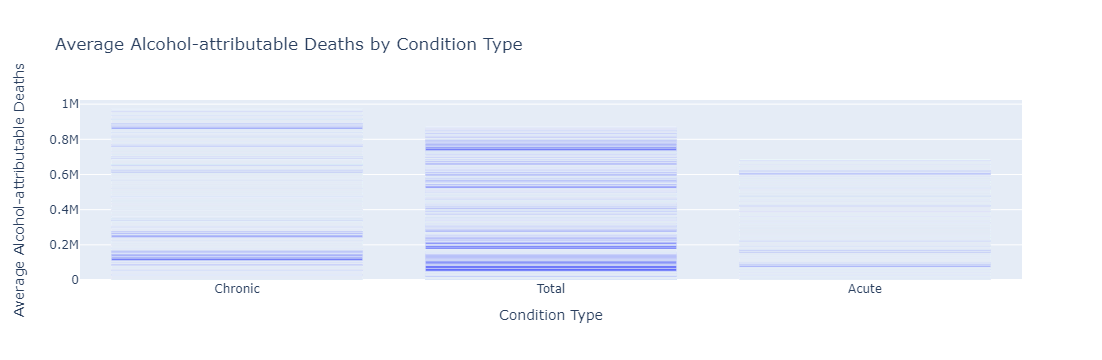

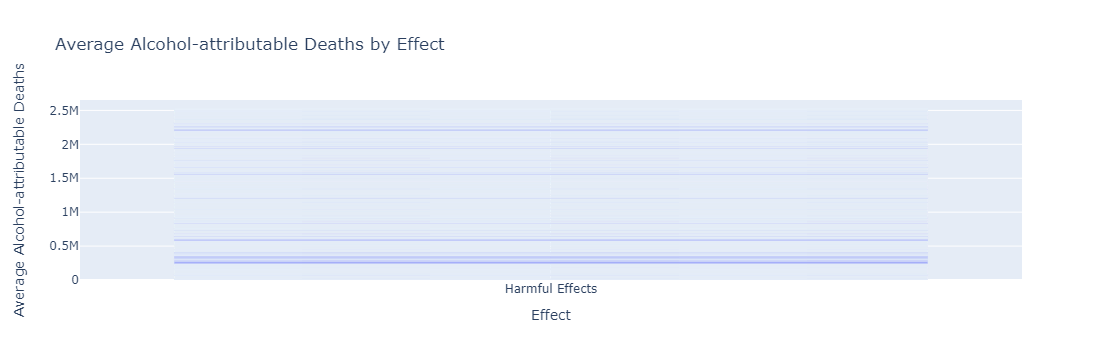

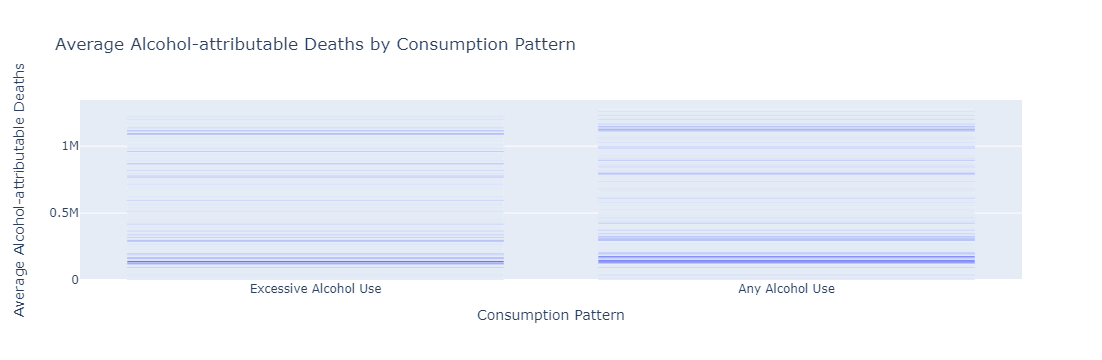

In [35]:
import plotly.express as px

# Correlation analysis
correlation_matrix = ardi_data_c.corr()

# Visualize correlation matrix
fig = px.imshow(correlation_matrix, color_continuous_scale='icefire')
fig.update_layout(title='Correlation Matrix', width=600, height=500)
fig.show()

# Comparison analysis - compare alcohol-attributable deaths between male and female
fig = px.box(ardi_data_c, x='Sex', y='Data_Value_Alt', color='Sex', title='Comparison of Alcohol-attributable deaths between Male and Female')
fig.update_xaxes(title='Sex')
fig.update_yaxes(title='Alcohol-attributable deaths')
fig.show()

# Comparison analysis - compare alcohol-attributable deaths between different age groups
fig = px.violin(ardi_data_c, x='AgeGroup', y='Data_Value_Alt', color='AgeGroup', title='Comparison of Alcohol-attributable deaths between Different Age Groups')
fig.update_xaxes(title='Age Group')
fig.update_yaxes(title='Alcohol-attributable deaths')
fig.show()
import plotly.express as px

# Location vs. Alcohol-attributable Deaths
fig_location = px.bar(ardi_data_c, x='LocationDesc', y='Data_Value_Alt', title='Average Alcohol-attributable Deaths by Location')
fig_location.update_xaxes(title='Location')
fig_location.update_yaxes(title='Average Alcohol-attributable Deaths')
fig_location.show()

# Age Group vs. Alcohol-attributable Deaths
fig_age = px.bar(ardi_data_c, x='AgeGroup', y='Data_Value_Alt', title='Average Alcohol-attributable Deaths by Age Group')
fig_age.update_xaxes(title='Age Group')
fig_age.update_yaxes(title='Average Alcohol-attributable Deaths')
fig_age.show()

# Cause of Death vs. Alcohol-attributable Deaths
fig_cause = px.bar(ardi_data_c, x='Cause_of_Death', y='Data_Value_Alt', title='Average Alcohol-attributable Deaths by Cause of Death')
fig_cause.update_xaxes(title='Cause of Death')
fig_cause.update_yaxes(title='Average Alcohol-attributable Deaths')
fig_cause.show()

# Condition Type vs. Alcohol-attributable Deaths
fig_condition = px.bar(ardi_data_c, x='ConditionType', y='Data_Value_Alt', title='Average Alcohol-attributable Deaths by Condition Type')
fig_condition.update_xaxes(title='Condition Type')
fig_condition.update_yaxes(title='Average Alcohol-attributable Deaths')
fig_condition.show()

# Effect vs. Alcohol-attributable Deaths
fig_effect = px.bar(ardi_data_c, x='Effect', y='Data_Value_Alt', title='Average Alcohol-attributable Deaths by Effect')
fig_effect.update_xaxes(title='Effect')
fig_effect.update_yaxes(title='Average Alcohol-attributable Deaths')
fig_effect.show()

# Consumption Pattern vs. Alcohol-attributable Deaths
fig_consumption = px.bar(ardi_data_c, x='ConsumptionPattern', y='Data_Value_Alt', title='Average Alcohol-attributable Deaths by Consumption Pattern')
fig_consumption.update_xaxes(title='Consumption Pattern')
fig_consumption.update_yaxes(title='Average Alcohol-attributable Deaths')
fig_consumption.show()



## multi variate analysis

In [43]:
ardi_data_c

YearStart  YearEnd LocationAbbr   LocationDesc DataSource  \
0           2015     2019           WV  West Virginia       ARDI   
1           2015     2019           WV  West Virginia       ARDI   
4           2015     2019           WV  West Virginia       ARDI   
5           2015     2019           WV  West Virginia       ARDI   
6           2015     2019           WV  West Virginia       ARDI   
...          ...      ...          ...            ...        ...   
62499       2015     2019           WY        Wyoming       ARDI   
62500       2015     2019           WY        Wyoming       ARDI   
62501       2015     2019           WY        Wyoming       ARDI   
62502       2015     2019           WY        Wyoming       ARDI   
62503       2015     2019           WY        Wyoming       ARDI   

      ConditionType Category        Cause_of_Death  Data_Value_Alt  \
0           Chronic    Total  Total for All Causes             0.0   
1             Total    Total  Total for All Causes             7.0   
4             Acute    Total  Total for All Causes           367.0   
5           Chronic    Total  Total for All Causes           406.0   
6             Total    Total  Total for All Causes           773.0   
...             ...      ...                   ...             ...   
62499       Chronic    Total  Total for All Causes            83.0   
62500         Total    Total  Total for All Causes           102.0   
62501         Acute    Total  Total for All Causes            19.0   
62502       Chronic    Total  Total for All Causes            77.0   
62503         Total    Total  Total for All Causes            96.0   

                Effect     ConsumptionPattern      Sex AgeGroup  AgeGroup_Cat  
0      Harmful Effects  Excessive Alcohol Use   Female  Overall       Overall  
1      Harmful Effects  Excessive Alcohol Use   Female  Overall       Overall  
4      Harmful Effects        Any Alcohol Use     Male  Overall       Overall  
5      Harmful Effects        Any Alcohol Use     Male  Overall       Overall  
6      Harmful Effects        Any Alcohol Use     Male  Overall       Overall  
...                ...                    ...      ...      ...           ...  
62499  Harmful Effects        Any Alcohol Use  Overall      65+  65 and older  
62500  Harmful Effects        Any Alcohol Use  Overall      65+  65 and older  
62501  Harmful Effects  Excessive Alcohol Use  Overall      65+  65 and older  
62502  Harmful Effects  Excessive Alcohol Use  Overall      65+  65 and older  
62503  Harmful Effects  Excessive Alcohol Use  Overall      65+  65 and older  

[11985 rows x 14 columns]

In [53]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_cols = ['LocationDesc', 'DataSource', 'ConditionType', 'Category', 
                    'Cause_of_Death', 'Effect', 'ConsumptionPattern', 'AgeGroup_Cat']
for col in categorical_cols:
    ardi_data_c[col] = label_encoder.fit_transform(ardi_data_c[col])

# Now, let's proceed with the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting the data into training and testing sets
X = ardi_data_c.drop(columns=['Data_Value_Alt'])
y = ardi_data_c['Data_Value_Alt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model
rf_regressor.fit(X_train, y_train)

# Making predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Evaluating the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Train RMSE: 288.33557652904693
Test RMSE: 421.30240408146705


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           cv=5, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Use the best estimator to make predictions
y_train_pred = best_estimator.predict(X_train)
y_test_pred = best_estimator.predict(X_test)

# Calculate RMSE
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Train RMSE: 364.0462490269612
Test RMSE: 401.5258797897418


## clustering and data processing for machince learning

In [ ]:
# List of states in the US
us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
    'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
    'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
    'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
    'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
    'West Virginia', 'Wisconsin', 'Wyoming'
]

# Convert LocationDesc values to strings for comparison
location_desc_lower = set(map(str.lower, map(str, ardi_data_c['LocationDesc'].unique())))

# Check for spelling and format consistency
for state in us_states:
    if state.lower() not in location_desc_lower:
        print(f"State '{state}' is missing or has a different format in the dataset.")


In [ ]:
# Convert LocationDesc values to strings for comparison
location_desc_lower = set(map(str.lower, map(str, ardi_data_c['LocationDesc'].unique())))

# Initialize a counter for states with issues
states_with_issues = 0

# Check for spelling and format consistency
for state in us_states:
    if state.lower() not in location_desc_lower:
        states_with_issues += 1

print(f"Number of states with issues: {states_with_issues}")


In [ ]:
# Get the unique values of the LocationDesc column
unique_location_desc = ardi_data_c['LocationDesc'].unique().tolist()

# Print the unique values
print(unique_location_desc)


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named df
# Select relevant features
cluster_data= ardi_data_c[['LocationDesc', 'Data_Value_Alt']].copy()  # not to affect original DataFrame

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(cluster_data[['Data_Value_Alt']])

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)  
kmeans.fit(normalized_data)

# Add cluster labels to the DataFrame using .loc
cluster_data.loc[:, 'Cluster'] = kmeans.labels_

# Export clustered data to CSV
cluster_data.to_csv('clustered_data.csv', index=False)


In [ ]:
cluster_data

In [ ]:
import pandas as pd

# Assuming your original DataFrame is named df
# Replace 'Location Desc', 'Cluster', and 'Data Value Alt' with your actual column names
cluster_data = {
    'LocationDesc': cluster_data['LocationDesc'],
    'Data_Value_Alt': cluster_data['Data_Value_Alt'],
    'Cluster': cluster_data['Cluster']
}

# Create DataFrame from dictionary
cluster_df = pd.DataFrame(cluster_data)

# Group by 'LocationDesc' and 'Cluster', calculate average 'Data_Value_Alt'
cluster_avg = cluster_df.groupby(['LocationDesc', 'Cluster'])['Data_Value_Alt'].mean().reset_index()

# # Group by 'LocationDesc' and calculate overall average 'Data_Value_Alt'
# state_avg = cluster_avg.groupby('LocationDesc')['Data_Value_Alt'].mean().reset_index()

# # Merge state_avg into cluster_df
# cluster_df = pd.merge(cluster_df, state_avg, on='LocationDesc', how='left', suffixes=('_cluster', '_state_avg'))

# # Display the new DataFrame
# print(cluster_df)


In [ ]:
cluster_df.to_csv("Cluster_2.csv")

In [ ]:
cluster_avg.head(10)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Now proceed with encoding the categorical columns
categorical_columns = ['LocationAbbr', 'LocationDesc', 'DataSource', 'ConditionType', 'Category', 'Cause_of_Death', 'Effect', 'ConsumptionPattern', 'Sex', 'AgeGroup_Cat', 'AgeGroup']  # Adjusted list of categorical columns

label_encoders = {}  # To store the label encoders for each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    ardi_data_c[col] = le.fit_transform(ardi_data_c[col].astype(str))
    label_encoders[col] = le


# Removing non-numeric columns for simplici
# Assuming Data_Value is object due to potential non-numeric values, thus not included
X = ardi_data_c.drop(['Data_Value_Alt'], axis=1)  # Exclude target variable and non-encoded Data_Value
y = ardi_data_c['Data_Value_Alt']

### Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### RandomForestRegressor for Feature Importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
features = X.columns

# Plotting Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [ ]:
ardi_data_c.to_csv("encoded_data.csv")

In [ ]:
importances


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude 'Datasource' and 'Effect' columns
ardi_data_c_numeric = ardi_data_c.drop(columns=['DataSource', 'Effect'])

# Calculate correlation matrix
corr_matrix = ardi_data_c_numeric.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()


In [ ]:
# Neural network tensorflow

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationAbbr','Sex', 'ConditionType', 'AgeGroup','Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data_c[col] = le.fit_transform(ardi_data_c[col])
    label_encoders[col] = le

# Split data into features and target
X = ardi_data_c[['LocationAbbr','Sex', 'ConditionType', 'AgeGroup','Category','Cause_of_Death']].values
y = ardi_data_c['Data_Value_Alt'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)  # Adjust epochs and batch size as needed

# Evaluate the model
y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Neural Network Predicted values:", y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


In [ ]:
# Random forest and GradientBoostingRegressor 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationAbbr','Sex', 'ConditionType', 'AgeGroup','Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data_c[col] = le.fit_transform(ardi_data_c[col])
    label_encoders[col] = le

# Split data into features and target
X = ardi_data_c[['LocationAbbr','Sex', 'ConditionType','AgeGroup','Category','Cause_of_Death']]
y = ardi_data_c['Data_Value_Alt']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

# Evaluate Random Forest model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Evaluate Gradient Boosting model
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

# Print results
print("Random Forest Results:")
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R2):", rf_r2)
print("\nGradient Boosting Results:")
print("Mean Squared Error (MSE):", gb_mse)
print("Mean Absolute Error (MAE):", gb_mae)
print("R-squared (R2):", gb_r2)


In [ ]:
# # Checking outliers

# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt


# # Statistical Methods: Z-Score
# z_scores = np.abs((ardi_data_c['Data_Value_Alt'] - ardi_data_c['Data_Value_Alt'].mean()) / ardi_data_c['Data_Value_Alt'].std())
# outliers_zscore = ardi_data_c[z_scores > 3]  # Threshold of ±3 standard deviations from the mean
# print("Outliers detected using Z-Score method:")
# print(outliers_zscore)


# # Statistical Methods: Interquartile Range (IQR)
# Q1 = ardi_data_c['Data_Value_Alt'].quantile(0.25)
# Q3 = ardi_data_c['Data_Value_Alt'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# outliers_iqr = ardi_data_c[(ardi_data_c['Data_Value_Alt']< lower_bound) | (ardi_data_c['Data_Value_Alt'] > upper_bound)]
# print("\nOutliers detected using IQR method:")
# print(outliers_iqr)


# # Machine Learning Methods: Isolation Forest
# isolation_forest = IsolationForest(contamination='auto')
# isolation_forest.fit(ardi_data_c[['Data_Value_Alt']])
# outliers_isolation_forest = ardi_data_c[isolation_forest.predict(ardi_data_c[['Data_Value_Alt']]) == -1]
# print("\nOutliers detected using Isolation Forest method:")
# print(outliers_isolation_forest)

# # Outlier Detection Algorithms: Local Outlier Factor (LOF)
# from sklearn.neighbors import LocalOutlierFactor
# lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
# outliers_lof = ardi_data_c[lof.fit_predict(ardi_data_c[['Data_Value_Alt']]) == -1]
# print("\nOutliers detected using LOF method:")
# print(outliers_lof)

# # Outlier Detection Algorithms: Robust Random Cut Forest (RRCF)
# rrcf = IsolationForest(contamination='auto')
# outliers_rrcf = ardi_data_c[rrcf.fit_predict(ardi_data_c[['Data_Value_Alt']]) == -1]
# print("\nOutliers detected using RRCF method:")
# print(outliers_rrcf)


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of bins dynamically
bin_count = min(int(np.sqrt(len(ardi_data_c['Data_Value_Alt']))), 20)  # Adjust the maximum number of bins as needed

# Visual Inspection: Histogram
plt.hist(ardi_data_c['Data_Value_Alt'], bins=bin_count, edgecolor='k')

# Calculate mean, median, and mode
mean_val = np.mean(ardi_data_c['Data_Value_Alt'])
median_val = np.median(ardi_data_c['Data_Value_Alt'])
mode_val = ardi_data_c['Data_Value_Alt'].mode()[0]  # In case there are multiple modes, take the first one

# Add annotations for mean, median, and mode
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='blue', linestyle='dashed', linewidth=1, label=f'Mode: {mode_val:.2f}')

# Set plot title and labels
plt.title('Histogram of Data_Value_Alt with Mean, Median, and Mode')
plt.xlabel('Data_Value_Alt')
plt.ylabel('Frequency')

# Show legend
plt.legend()

# Show plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set style
sns.set_style("whitegrid")

# Visual Inspection: Smooth Curve (Kernel Density Estimate)
sns.kdeplot(ardi_data_c['Data_Value_Alt'], color='skyblue', fill=True)

# Calculate mean, median, and mode
mean_val = ardi_data_c['Data_Value_Alt'].mean()
median_val = ardi_data_c['Data_Value_Alt'].median()
mode_val = ardi_data_c['Data_Value_Alt'].mode()[0]  # In case there are multiple modes, take the first one

# Add annotations for mean, median, and mode
plt.axvline(mean_val, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='blue', linestyle='-.', linewidth=2, label=f'Mode: {mode_val:.2f}')

# Set plot title and labels
plt.title('Smooth Curve (Kernel Density Estimate) ofAlcohol attributted Deaths with Mean, Median, and Mode', fontsize=18)
plt.xlabel('Deaths', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Format y-axis ticks
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

# Set x-axis limits for zooming
plt.xlim(0, 10000)  # Adjust the limits as needed

# Show legend
plt.legend(fontsize=12, loc='upper right')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust figure size
plt.figure(figsize=(10, 6))

# Show plot
plt.show()


## univarate analysis

In [ ]:
ardi_data_c